### What is an adopted user?

Someone who logged in on three seperate days during a 7-day period. Goal is to indentify which factors predict future user adoption

In [94]:
# Set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

In [96]:
# Load the data
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [97]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [98]:
# get information assessing the size of dataset
# identifying missing values at a high level and checking if columns have the correct data types
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [99]:
# convert time_stamp to datetime
df_engagement.time_stamp = pd.to_datetime(df_engagement.time_stamp, format = '%Y-%m-%d %H:%M:%S')

In [100]:
# check for missing values
df_engagement.isna().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [101]:
# load other dataset
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [102]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [103]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [118]:
# rename 'object_id' to 'user_id'
df_users.rename(columns={'object_id': 'user_id'}, inplace=True)

In [120]:
# convert creation_time to datetime
df_users.creation_time = pd.to_datetime(df_users.creation_time, format = '%Y-%m-%d %H:%M:%S')

In [122]:
df_users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [124]:
# check for missing data in the users df
df_users.isna().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [126]:
# Missing values so far.....
# invited_by_user_id has lots of missing data, we can assume that this user signed up without a guest invitation
# last_session_creation_time means only one sign on, can be replaced with creation_time

### EDA

In [129]:
# explore where users signed up from
df_users.creation_source.value_counts()

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

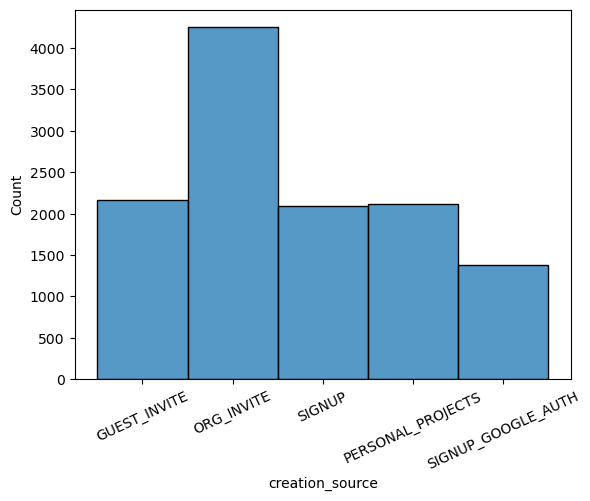

In [131]:
# plot creation source

sns.histplot(data = df_users, x='creation_source')
plt.xticks(rotation =25)

In [133]:
# explore if users opted in to mailing list for funsies
df_users.opted_in_to_mailing_list.value_counts()

opted_in_to_mailing_list
0    9006
1    2994
Name: count, dtype: int64

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

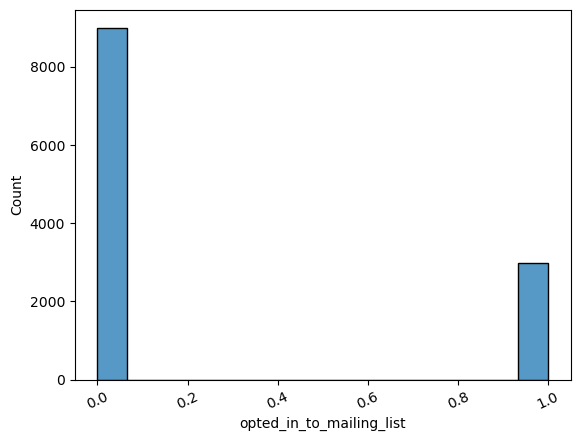

In [135]:
# plot opt in to junk mail

sns.histplot(data = df_users, x='opted_in_to_mailing_list')
plt.xticks(rotation =25)

In [136]:
# huge number opted to NOT get junk mail

In [139]:
# Number of user id's logged in per day
df_engagement.groupby(df_engagement.time_stamp.dt.date)['user_id'].count()

time_stamp
2012-05-31      4
2012-06-01      6
2012-06-02      9
2012-06-03     11
2012-06-04     11
             ... 
2014-06-01    450
2014-06-02    404
2014-06-03    398
2014-06-04    373
2014-06-06      1
Name: user_id, Length: 736, dtype: int64

In [141]:
# sorting to see what time, which user, and how many times the user visited

df_engagement_sorted = df_engagement.sort_values(by=['time_stamp'], axis = 0, ascending = True)
df_engagement_sorted = df_engagement_sorted.reset_index(drop=True)
df_engagement_sorted.head()

,time_stamp,user_id,visited
0,2012-05-31 08:20:06,10012,1
1,2012-05-31 15:47:36,3428,1
2,2012-05-31 17:19:37,9899,1
3,2012-05-31 21:58:33,1693,1
4,2012-06-01 00:17:30,6102,1


In [143]:
# clean up the time stamp to limit it just the date
#  transform the time_stamp from precise, chronologically ordered login events into a date grouped by calendar date
# with user IDs sorted within each date. 
# result is to focuses the view on daily activity rather than timestamped activity

In [145]:
df_engagement_sorted.time_stamp = df_engagement_sorted.time_stamp.dt.date

In [147]:
df_engagement_sorted.sort_values(by=['time_stamp', 'user_id'], inplace=True)

In [149]:
df_engagement_sorted.head(15)

,time_stamp,user_id,visited
3,2012-05-31,1693,1
1,2012-05-31,3428,1
2,2012-05-31,9899,1
0,2012-05-31,10012,1
6,2012-06-01,1995,1
4,2012-06-01,6102,1
8,2012-06-01,8068,1
7,2012-06-01,10163,1
9,2012-06-01,10922,1
5,2012-06-01,11430,1


In [151]:
# check the types of the newly sorted df
df_engagement_sorted.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [153]:
# preprocess df_engagement_sorted again to ensure that the time_stamp is compatible with the merge

df_eng_sorted.time_stamp = pd.to_datetime(df_eng_sorted.time_stamp, format = '%Y-%m-%d')

In [155]:
# Function to show adopted users
# reminder: adopted user is a user who has logged in at least 3 times within a 7 day window

def is_adopted(eng_df):
    # Get time range of engagement dataframe
    start, end = eng_df.time_stamp.min(), eng_df.time_stamp.max()
    # Create data frame of date range
    dates = pd.date_range(start, end).to_frame(index=False, name='time_stamp')
    # merge dates and engagement data frame
    df_adopted = dates.merge(eng_df, on='time_stamp', how='left').fillna(0)
    # Check for 3 engagements within a 7 day rolling window
    return df_adopted['visited'].rolling(7).sum().max() >= 3

In [159]:
# go through all the users
# checks each one using specific activity rule
# gives you a final list showing who passed the check (is 'adopted') and who didn't
adopted_users = df_eng_sorted.groupby('user_id').apply(is_adopted, include_groups=False ).reset_index(name='adopted_user')
adopted_users.head(10)

,user_id,adopted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False
5,6,False
6,7,False
7,10,True
8,11,False
9,13,False


In [160]:
# convert the True / False to a numeric value
adopted_users.adopted_user.astype(int)

0       0
1       1
2       0
3       0
4       0
       ..
8818    0
8819    0
8820    0
8821    0
8822    0
Name: adopted_user, Length: 8823, dtype: int64

In [165]:
# merge the two datasets
# using outer merge because want to keep all rows from both

df_merged = pd.merge(df_users, adopted_users, on='user_id', how='outer')

In [167]:
df_merged.head(15)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


In [169]:
# how many users were classified as 'adopted' (1) and how many were classified as 'not adopted' (0)
df_merged.adopted_user.value_counts()

adopted_user
False    7226
True     1597
Name: count, dtype: int64

In [171]:
# count how many rows in merged dataset
len(df_merged)

12000

In [175]:
# calculation for adopted_user total
false = 7226
true = 1597
total_adopted = false + true
print(total_adopted)

8823


In [195]:
# percent of true adopted users
(true/total_adopted) * 100

18.100419358494843

In [199]:
# Explore which domain did most signups come from but need to get the domains below
# 1. Access the 'email' column
# 2. Use '.str.split('@')' to split the email string into parts before and after '@'
# 3. Use '.str.get(1)' to safely get the second part (the domain)
# 4. Use '.value_counts()' to count how many times each domain appears

domain_counts = df['email'].str.split('@').str.get(1).value_counts()
print(domain_counts)

email
gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: count, Length: 1184, dtype: int64


In [207]:
# how many unique domains are there?
unique_domain_count = df_merged['email'].str.split('@').str.get(1).nunique()
print(unique_domain_count) 
# There are 1184 unique domainsdwith the top 5 being: gmail, yahoo, jourrapide, cuvox, gustr

1184


In [209]:
#check invited by user counts
df_merged.invited_by_user_id.value_counts()

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: count, Length: 2564, dtype: int64

In [211]:
# check missing values for invited by user
df_merged.invited_by_user_id.isna().sum()

5583

### Feature Engineering

In [217]:
# create a new column in your DataFrame df_merged called invited_by_user
# creates a simple flag (True/False) column
# np.where(...): This function checks a condition for every row.
# df['invited_by_user_id'].isna(): condition being checked, looks at the invited_by_user_id for each user
# returns True if it's missing (NaN) and False if it has a value (an ID).
# sets the value to True if the user was invited
# sets the value to False if the user was not invited

df_merged['invited_by_user'] = np.where(df_merged['invited_by_user_id'].isna(), False, True)


In [219]:
df_merged.head(15)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_by_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,True
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,True
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,True
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,True
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,False,True
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,False,False
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,False
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,False
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True,True


In [221]:
# check for missing values in this newly created column
df_merged.adopted_user.isna().sum()

3177

### Visualizations

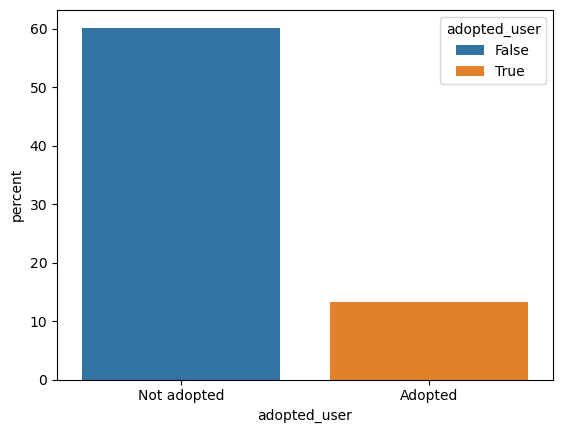

In [223]:
# adopted vs not adopted users
sns.countplot(x='adopted_user', data=df_merged, stat='percent', hue='adopted_user')
plt.xticks([0,1], ['Not adopted', 'Adopted']);

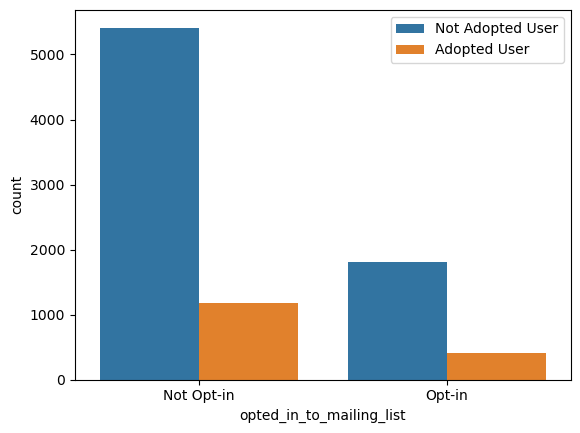

In [227]:
# adopted vs not adopted based on whether opting into email or not
sns.countplot(x="opted_in_to_mailing_list", hue="adopted_user", data=df_merged)
plt.legend(labels=["Not Adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks([0,1], ['Not Opt-in', 'Opt-in']);

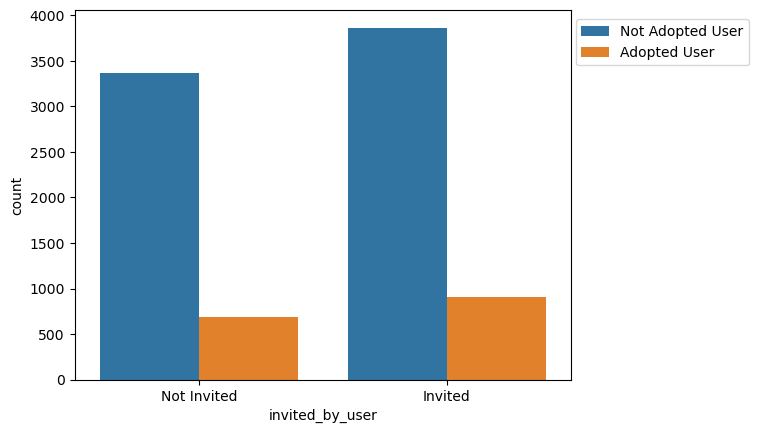

In [229]:
# adopted vs not adopted based on invite yes or no
sns.countplot(x="invited_by_user", hue="adopted_user", data=df_merged)
plt.legend(labels=["Not Adopted User", "Adopted User"], title="", loc=(1.01, 0.85))
plt.xticks([False, True], ['Not Invited', 'Invited']);

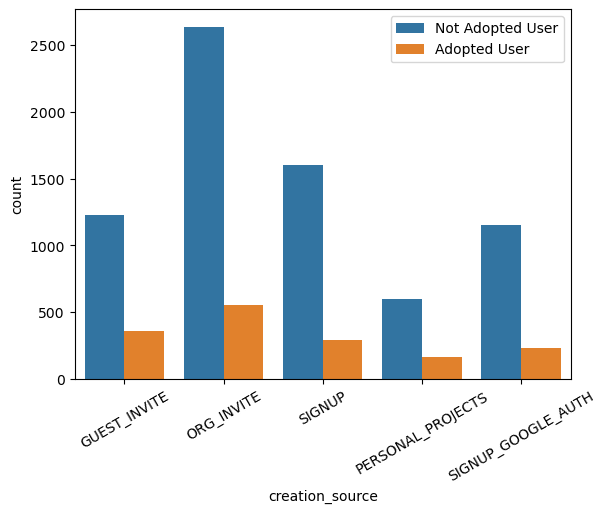

In [225]:
# adopted vs not adopted based on each type of invitation
sns.countplot(x="creation_source", hue="adopted_user", data=df_merged)
plt.legend(labels=["Not Adopted User", "Adopted User"], title="", loc="upper right")
plt.xticks(rotation=30);

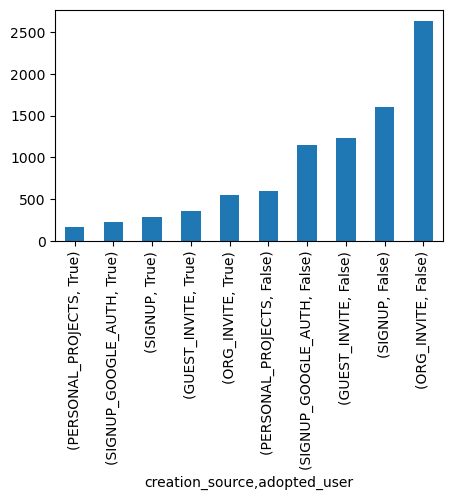

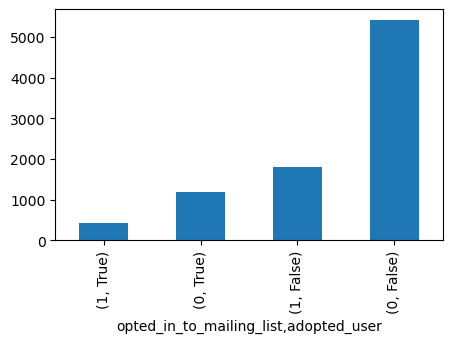

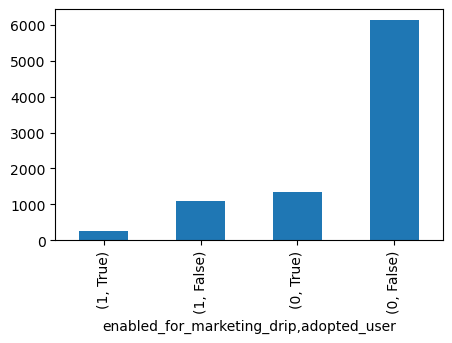

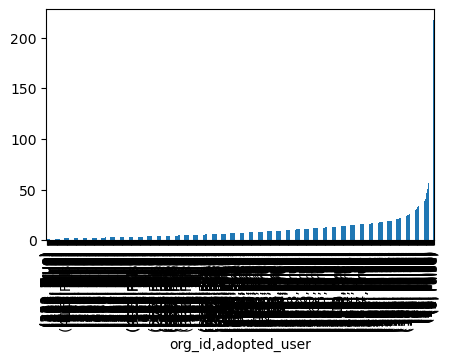

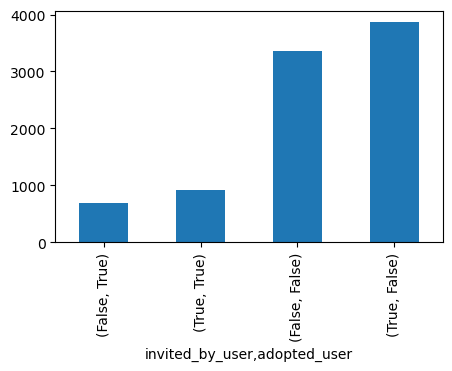

In [232]:
# for each potential factor, create seperate bar chart for HOW MANY
# for each category within the factor, how many were adopted

# fefine the list of column names (factors) to analyze
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'org_id', 'invited_by_user']

# loop through each column name specified in the 'factors' list
for factor in factors:
    # create a new, separate figure for the plot
    plt.figure(figsize=(5, 3))

    # group data by current factor's categories, count adopted (1) / non-adopted (0) within each, sort by counts, then create a bar plot
    df_merged.groupby(factor)['adopted_user'].value_counts().sort_values().plot(kind='bar') 
    
    # generat plot for the current factor
    plt.show();
    

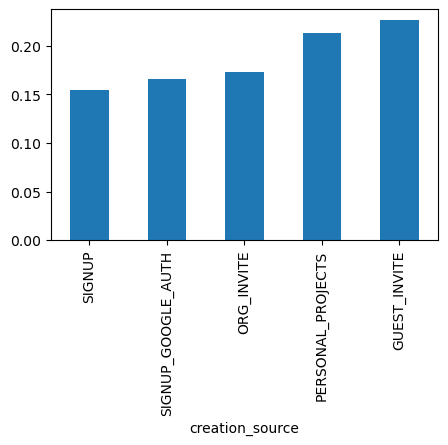

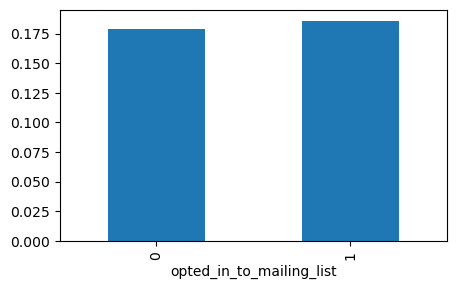

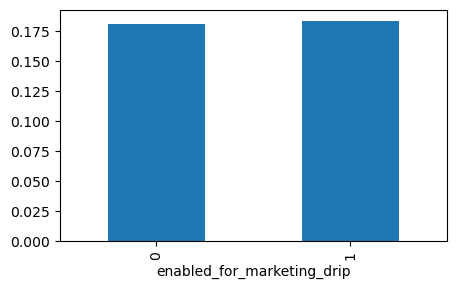

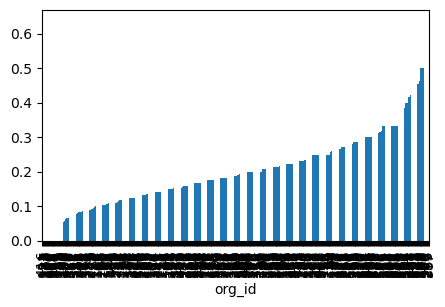

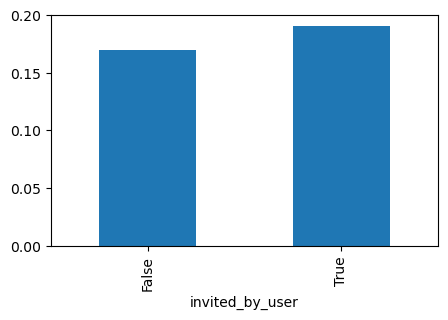

In [236]:
# plotting the adoption rate, proportion for each group

# list of column names (factors) to analyze
factors = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
        'org_id', 'invited_by_user']

# loop through each column name specified in the 'factors' list
for factor in factors:
    # create a new, separate figure for the plot (5 inches wide, 3 inches tall)
    plt.figure(figsize=(5, 3))
    
    # group data by current factor's categories, calculate the MEAN adoption rate within each, sort by rate, then create a bar plot
    df_merged.groupby(factor)['adopted_user'].mean().sort_values().plot(kind='bar') 
    
    # Display the generated plot for the current factor
    plt.show();

### Conclusions

Factors that seem irrelevant include: opting into emails and getting marketing emails. 

Factors that seem interesting and contribute to adopted users are: whether the user got invited and the creation source, e.g, invitation by organization, guest invite, signup, signup via google auth, or if it was personal project related. 